In [41]:
import matplotlib.pyplot as plt
def pplot(xy_tuples):
    xx = []
    yy = []
    
    for xy in xy_tuples:
        xx.append(xy[0])
        yy.append(xy[1])
        
    plt.plot(xx, yy, c="green", marker="^")
    
    idx = 0
    for xy in zip(xx,yy):
        plt.annotate("%d" % idx, xy=xy, xytext=(-10,5), textcoords='offset points')
        idx += 1

    plt.grid()
    plt.show()

### 1. 拆多边形的边作为线段

In [14]:
# wooey_utils/check_data/apa_freespace/apa_freespace_check.py
def polygon_split_2_lines(polygon_points):
    # polygon_points [[(x,y),(x,y)],[(x,y),(x,y)]]
    lines = []
    for idx in range(len(polygon_points)):
        if idx + 1 == len(polygon_points):
            lines.append([tuple(polygon_points[idx]), tuple(polygon_points[0])])
        else:
            lines.append([tuple(polygon_points[idx]), tuple(polygon_points[idx + 1])])
    return lines

points = [[0,1],[1,1],[1,0],[0,0]]
polygon_split_2_lines(points)

[[(0, 1), (1, 1)], [(1, 1), (1, 0)], [(1, 0), (0, 0)], [(0, 0), (0, 1)]]

In [18]:
from shapely.geometry import Polygon
from shapely.geometry.polygon import orient

poly = Polygon([[0,1],[1,1],[1,0],[0,0]])
ccw_poly = orient(poly, sign=1.0)
ccw_pts = list(ccw_poly.exterior.coords)
lines = []
for idx, point in enumerate(ccw_pts[:-1]):
    lines.append([point, ccw_pts[idx+1]])
lines

[[(0.0, 1.0), (0.0, 0.0)],
 [(0.0, 0.0), (1.0, 0.0)],
 [(1.0, 0.0), (1.0, 1.0)],
 [(1.0, 1.0), (0.0, 1.0)]]

### 2. 判断多边形的角点顺序是顺时针方向或逆时针方向

In [56]:
## test data
points = [
{
    "x": 2139,
    "y": 785
},
{
    "x": 2150,
    "y": 784
},
{
    "x": 2144,
    "y": 774
},
{
    "x": 2144,
    "y": 790
}
]

def get_points_list(points_dict_list):
    points_xy = []
    for xy_dict in points_dict_list:
        points_xy.append((xy_dict["x"],xy_dict["y"]))
    return points_xy

pts = get_points_list(points)

In [57]:
# wooey_utils/check_data/dj/dj_2d_check_v1.py
def calculate_polygon_area(points_list):
    n = len(points_list)
    d = 0
    for i in range(n - 1):
        d += -0.5 * (points_list[i + 1][1] + points_list[i][1]) * (points_list[i + 1][0] - points_list[i][0])
    d += -0.5 * (points_list[0][1] + points_list[n - 1][1]) * (points_list[0][0] - points_list[n - 1][0])

    order = "顺时针" if d > 0 else "逆时针"
    return order

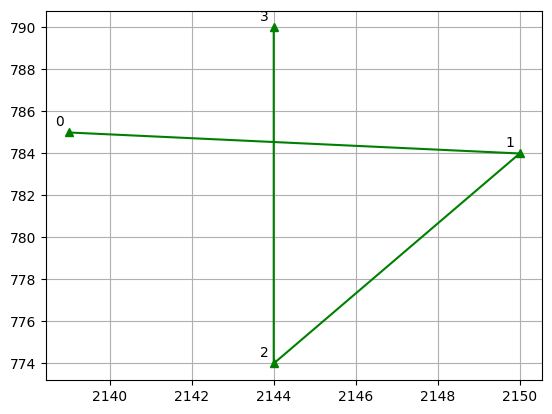

Shapely结果： 逆时针
calculate_polygon_area结果： 逆时针


In [58]:
from shapely.geometry import LinearRing
pplot(pts)
print("Shapely结果：", "逆时针" if LinearRing(pts).is_ccw else "顺时针")
print(f"calculate_polygon_area结果：", calculate_polygon_area(pts))

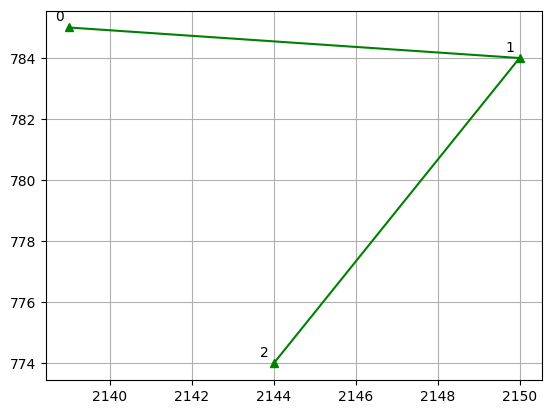

Shapely结果： 顺时针
calculate_polygon_area结果： 逆时针


In [59]:
pts_part = pts[:-1]
pplot(pts_part)
print("Shapely结果：", "逆时针" if LinearRing(pts_part).is_ccw else "顺时针")
print(f"calculate_polygon_area结果：", calculate_polygon_area(pts_part))

In [62]:
Polygon(pts).is_valid

False

In [63]:
Polygon(pts).is_simple

False

In [66]:
from shapely import is_valid_reason
is_valid_reason(Polygon(pts))

'Self-intersection[2144 784.545454545455]'